In [58]:
import numpy as np
def f(x):
    res = (((np.pi)**2)/2)*(np.sin(2*np.pi*x)-3*np.sin(6*np.pi*x))           #задаем функцию правой части
    return res

def Ttoch(x):       #задаем точное решение
    return(np.sin(2*np.pi*x))

Nx = 800                          #задать кол-во узлов по x.  Это кол-во отрезков (тк плюс еще нулевой узел будет!)
x = np.linspace(0, 1, Nx+1)
k = np.zeros(Nx+1)       
Lx = x[Nx]-x[0]

T = np.zeros(Nx+1)
hx = Lx/Nx
print(Ttoch(1))

-2.4492935982947064e-16


In [59]:
#сама прогонка

T[0]=Ttoch(0)             #функция при х=0 
T[Nx]=Ttoch(1)            #функция при х=1
for i in range(Nx+1):                    
    k[i]= (1/2)*(Ttoch(x[i]))**2
    ai= np.zeros(Nx-1)
    bi= np.zeros(Nx-1)    
    Ai = np.zeros(Nx-1)            #вычисление Ai Bi Ci Di
    Bi = np.zeros(Nx-1)
    Ci = np.zeros(Nx-1)
    Di = np.zeros(Nx-1)
for j in range(Nx-1):
    i=j+1
    Ai[j]= -(k[i]+k[i-1])/(2*hx**2)
    Bi[j]= (2*k[i]+k[i+1]+k[i-1])/(2*hx**2)
    Ci[j]= -(k[i]+k[i+1])/(2*hx**2)
    Di[j]= f(x[i])
ai[0]= -Ci[0]/Bi[0]                     #вычисляем альфа и бетта - первые отдельно, и потом до Nx-1
bi[0]= (Di[0]-Ai[0]*T[0])/Bi[0]
for j in range(Nx-2): 
    i=j+1
    ai[i]= -Ci[i]/(Ai[i]*ai[i-1]+Bi[i])
    bi[i]= (Di[i]-Ai[i]*bi[i-1])/(Ai[i]*ai[i-1]+Bi[i])

for j in range(Nx-1):                   #обратной прогонкой находим Т = n+1ю строчку в матрице значений 
    i=Nx-1-j
    T[i]=ai[i-1]*T[i+1]+bi[i-1]
print(Ttoch(1))

-2.4492935982947064e-16


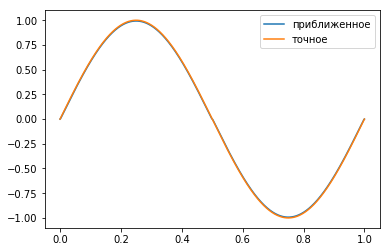

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,T, label = 'приближенное')
#plt.scatter(x, y)
plt.plot(x, Ttoch(x), label = 'точное')
#plt.scatter(x, Ttoch(x))

plt.legend()

In [61]:
E = np.zeros(Nx+1)
for i in range(Nx+1):
    E[i]=abs(Ttoch(x[i])-T[i])
epsMax = max(E)
print(epsMax)

0.007475543956118713


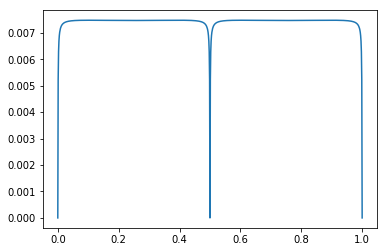

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,E)
#plt.scatter(x, y)

In [ ]:
0.05620867827749887          #при 100

In [ ]:
0.029111017523537286            #при  200

In [ ]:
0.014817459275667355            #при  400

In [ ]:
0.007475543956118713            #при 800

In [1]:
import numpy as np
print(np.pi)

3.141592653589793
